In [ ]:
import pandas as pd
df=pd.read_csv("/content/shopping_behavior_updated.csv")
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


# New Section

In [ ]:
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [ ]:
df.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=['Gender','Item Purchased','Category','Location','Size','Color','Season','Subscription Status','Shipping Type','Discount Applied','Promo Code Used','Payment Method','Frequency of Purchases']
for i in lst:
  df[i]=le.fit_transform(df[i])

In [ ]:
df.dtypes

Customer ID                 int64
Age                         int64
Gender                      int64
Item Purchased              int64
Category                    int64
Purchase Amount (USD)       int64
Location                    int64
Size                        int64
Color                       int64
Season                      int64
Review Rating             float64
Subscription Status         int64
Shipping Type               int64
Discount Applied            int64
Promo Code Used             int64
Previous Purchases          int64
Payment Method              int64
Frequency of Purchases      int64
dtype: object

In [ ]:
from sklearn.preprocessing import normalize
df1=normalize(df)
df1

array([[0.01250136, 0.68757467, 0.01250136, ..., 0.17501901, 0.06250679,
        0.03750407],
       [0.02697631, 0.25627494, 0.01348815, ..., 0.02697631, 0.01348815,
        0.04046446],
       [0.03145613, 0.52426889, 0.01048538, ..., 0.24116369, 0.02097076,
        0.06291227],
       ...,
       [0.99984332, 0.01179907, 0.        , ..., 0.00615604, 0.00128251,
        0.00128251],
       [0.99969389, 0.01128149, 0.        , ..., 0.00615354, 0.00128199,
        0.00153839],
       [0.99965483, 0.01332873, 0.        , ..., 0.00845862, 0.00128161,
        0.00128161]])

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,9):
  km=KMeans(n_clusters=i,init='k-means++',random_state=3)
  km.fit(df1)
  wcss.append(km.inertia_)


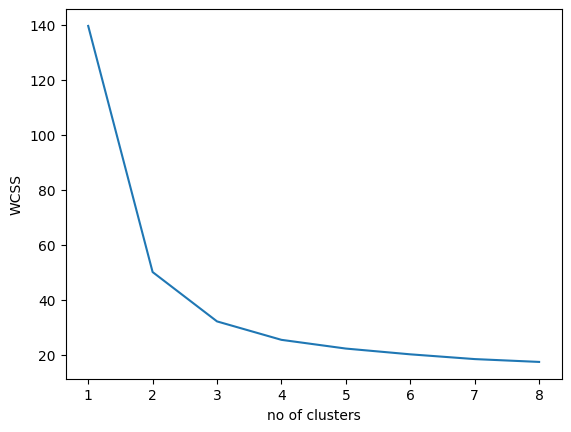

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,9),wcss)
plt.xlabel('no of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
km=KMeans(n_clusters=5,init='k-means++',random_state=3)
km.fit(df1)
y_pred=km.predict(df1)
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
cluster.fit_predict(df1)

array([1, 1, 1, ..., 3, 3, 3])